# Customize Simglucose env

In [3]:
### import libraries
import gym

from garage.envs.normalized_env import normalize
from garage.exploration_strategies.ou_strategy import OUStrategy
from garage.replay_buffer import SimpleReplayBuffer
from gym.envs.registration import register
from datetime import datetime

__Padova_params__

<img src="./docs/padova_params.png">

### Customize Patient profile

In [111]:
PATIENT_PARA_FILE = pkg_resources.resource_filename(
    'simglucose', 'params/vpatient_params.csv')

In [113]:
patient_params = pd.read_csv(PATIENT_PARA_FILE)

In [114]:
pd.options.display.max_columns = 1000
patient_params.head(5)

,Name,i,x0_ 1,x0_ 2,x0_ 3,x0_ 4,x0_ 5,x0_ 6,x0_ 7,x0_ 8,x0_ 9,x0_10,x0_11,x0_12,x0_13,BW,EGPb,Gb,Ib,kabs,kmax,kmin,b,d,Vg,Vi,Ipb,Vmx,Km0,k2,k1,p2u,m1,m5,CL,HEb,m2,m4,m30,Ilb,ki,kp2,kp3,f,Gpb,ke1,ke2,Fsnc,Gtb,Vm0,Rdb,PCRb,kd,ksc,ka1,ka2,dosekempt,u2ss,isc1ss,isc2ss,kp1,patient_history
0,adolescent#001,1,0,0,0,250.621836,176.506560,4.697518,0,97.554,97.554,3.198149,57.951224,93.225883,250.621836,68.706,3.3924,149.02,97.554,0.091043,0.015865,0.008334,0.83072,0.32294,1.6818,0.048153,4.697518,0.074667,260.89,0.067738,0.057252,0.021344,0.15221,0.029902,0.85710,0.6,0.259068,0.103627,0.228315,3.198149,0.008884,0.023318,0.023253,0.9,250.621836,0.0005,339,1,176.506560,5.928548,3.3924,0.022765,0.0185,0.0560,0.0025,0.0115,90000,1.216976,57.951224,93.225883,11.504823,0
1,adolescent#002,2,0,0,0,280.236267,30.954131,6.019305,0,119.180,119.180,4.968708,77.848476,47.172125,280.236267,51.046,2.4905,152.41,119.180,0.124730,0.034573,0.006983,0.76876,0.18887,1.8387,0.050506,6.019305,0.038897,223.01,0.286430,0.036957,0.017681,0.14477,0.036533,0.77023,0.6,0.298755,0.119502,0.217155,4.968708,0.008460,0.002688,0.007995,0.9,280.236267,0.0005,339,1,30.954131,12.228854,2.4905,0.016341,0.0163,0.1314,0.0068,0.0269,90000,1.798300,77.848476,47.172125,4.196579,0
2,adolescent#003,3,0,0,0,326.553380,383.368339,3.487881,0,101.280,101.280,5.277380,80.796984,81.342909,326.553380,44.791,2.8199,145.90,101.280,0.046752,0.046773,0.006626,0.56424,0.14423,2.2382,0.034438,3.487881,0.060762,216.57,0.080467,0.100040,0.065784,0.10962,0.016546,0.63961,0.6,0.414655,0.165862,0.164430,5.277380,0.009423,0.006092,0.017571,0.9,326.553380,0.0005,339,1,383.368339,2.847986,2.8199,0.019328,0.0149,0.1059,0.0030,0.0148,90000,1.446266,80.796984,81.342909,6.588789,0
3,adolescent#004,4,0,0,0,248.117090,214.758608,4.316765,0,108.880,108.880,3.956083,97.383030,124.746857,248.117090,49.564,3.2437,144.70,108.880,0.144520,0.030833,0.009608,0.77607,0.14467,1.7147,0.039647,4.316765,0.056525,248.78,0.072980,0.072211,0.037027,0.17822,0.021820,0.80238,0.6,0.408323,0.163329,0.267330,3.956083,0.005835,0.004626,0.015157,0.9,248.117090,0.0005,339,1,214.758608,4.842840,3.2437,0.022417,0.0155,0.0751,0.0026,0.0121,90000,1.762633,97.383030,124.746857,6.041685,0
4,adolescent#005,5,0,0,0,279.047113,144.715759,5.162898,0,113.090,113.090,4.634640,83.860398,71.541921,279.047113,47.074,2.8283,139.03,113.090,1.232300,0.025659,0.025281,0.98829,0.13898,2.0071,0.045653,5.162898,0.050384,278.74,0.140220,0.079271,0.032703,0.13245,0.014914,0.63880,0.6,0.297245,0.118898,0.198675,4.634640,0.010166,0.003981,0.006216,0.9,279.047113,0.0005,339,1,144.715759,5.349826,2.8283,0.020343,0.0151,0.0866,0.0032,0.0177,90000,1.534645,83.860398,71.541921,4.642232,0


In [115]:
patient_name = 'adolescent#001'
params = patient_params.loc[patient_params.Name == patient_name].squeeze()

In [116]:
params['BW'] = 70.1
params['Gpb'] = 240
params['Gb'] = 70
params['x0_ 1']  = 200
params['x0_ 2']  = 50
params['x0_ 3']  = 50
params['x0_ 4']  = 50
params['x0_ 5']  = 50
params['x0_ 6']  = 50
params['x0_ 7']  = 50
params['x0_ 8']  = 50
params['x0_ 9']  = 50
params['x0_ 10'] = 50
params['x0_ 11'] = 50
params['x0_ 12'] = 50
params['x0_ 13'] = 50

In [117]:
from simglucose.patient.t1dpatient import T1DPatient
patient = T1DPatient(params)

In [119]:
from simglucose.sensor.cgm import CGMSensor
from simglucose.simulation.env import T1DSimEnv
from simglucose.actuator.pump import InsulinPump
from simglucose.simulation.scenario import CustomScenario
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')


# specify start_time as the beginning of today
now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())

# custom scenario is a list of tuples (time, meal_size)
scen = [(0,0),(5,100)]
scenario = CustomScenario(start_time=start_time, scenario=scen)

# create simulation environment
env = T1DSimEnv(patient, sensor, pump, scenario)

### Customize Controller Profile

In [17]:
import pkg_resources
import pandas as pd

update quest params

In [63]:
CONTROL_QUEST = pkg_resources.resource_filename(
    'simglucose', 'params/Quest.csv')
quest = pd.read_csv(CONTROL_QUEST)

In [77]:
quest.loc[quest['Name'] =='adolescent#001','CR'] = 1
quest.loc[quest['Name'] =='adolescent#001','CF'] = 1
quest.loc[quest['Name'] =='adolescent#001','TDI'] = 1

In [97]:
from simglucose.controller.base import Controller
from simglucose.controller.base import Action
import numpy as np

create a customized Ctroller that takes `quest` as a parameter

In [110]:
PATIENT_PARA_FILE = pkg_resources.resource_filename(
    'simglucose', 'params/vpatient_params.csv')


class IZController(Controller):
    def __init__(self,quest, target=140):
        self.quest = quest
        self.patient_params = pd.read_csv(
            PATIENT_PARA_FILE)
        self.target = target

    def policy(self, observation, reward, done, **kwargs):
        sample_time = kwargs.get('sample_time', 1)
        pname = kwargs.get('patient_name')
        meal = kwargs.get('meal')

        action = self._bb_policy(
            pname,
            meal,
            observation.CGM,
            sample_time)
        return action

    def _bb_policy(self, name, meal, glucose, env_sample_time):
        if any(self.quest.Name.str.match(name)):
            q = self.quest[self.quest.Name.str.match(name)]
            params = self.patient_params[self.patient_params.Name.str.match(
                name)]
            u2ss = np.asscalar(params.u2ss.values)
            BW = np.asscalar(params.BW.values)
        else:
            q = pd.DataFrame([['Average', 1 / 15, 1 / 50, 50, 30]],
                             columns=['Name', 'CR', 'CF', 'TDI', 'Age'])
            u2ss = 1.43
            BW = 57.0

        basal = u2ss * BW / 6000
        if meal > 0:
            #logger.info('Calculating bolus ...')
            #logger.debug('glucose = {}'.format(glucose))
            bolus = np.asscalar(meal / q.CR.values + (glucose > 150)
                                * (glucose - self.target) / q.CF.values)
        else:
            bolus = 0

        bolus = bolus / env_sample_time
        action = Action(basal=basal, bolus=bolus)
        return action

    def reset(self):
        pass

In [120]:
controller = IZController(quest,target=90)

Process ID: 22624
Simulation starts ...
Simulation Completed!


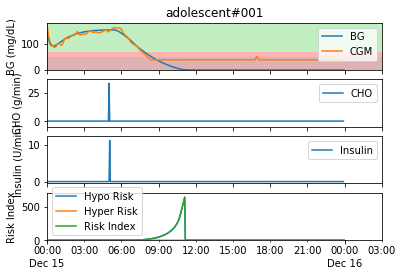

In [121]:
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from datetime import timedelta

# Specify res|ults saving path
path = './results'

# Create a controller
#controller = BBController()
controller = IZController(quest,target=90)

# Put them together to create a simulation object
s2 = SimObj(env, controller, timedelta(days=1), animate=True, path=path)
results2 = sim(s2)